# **Dataset Load and Dataset Summary**

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
0,1,6.3,0.025,0.001,0.00002,1000,1.8,0.07,0.0,0.051
1,1,4.0,0.040,0.001,0.00002,1000,1.8,0.07,0.0,0.051
2,1,6.3,0.040,0.001,0.00002,1000,1.8,0.07,0.0,0.051
3,1,4.0,0.063,0.001,0.00002,1000,1.8,0.07,0.0,0.051
4,1,6.3,0.063,0.001,0.00002,1000,1.8,0.07,0.0,0.051


,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
5670,5,2.70096,15.8561,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5671,5,1.58784,15.8394,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5672,5,1.05338,16.0692,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5673,5,1.05397,25.7439,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5674,5,1.66789,26.1616,0.001,0.00002,1000,1.8,0.07,-80.0,0.025


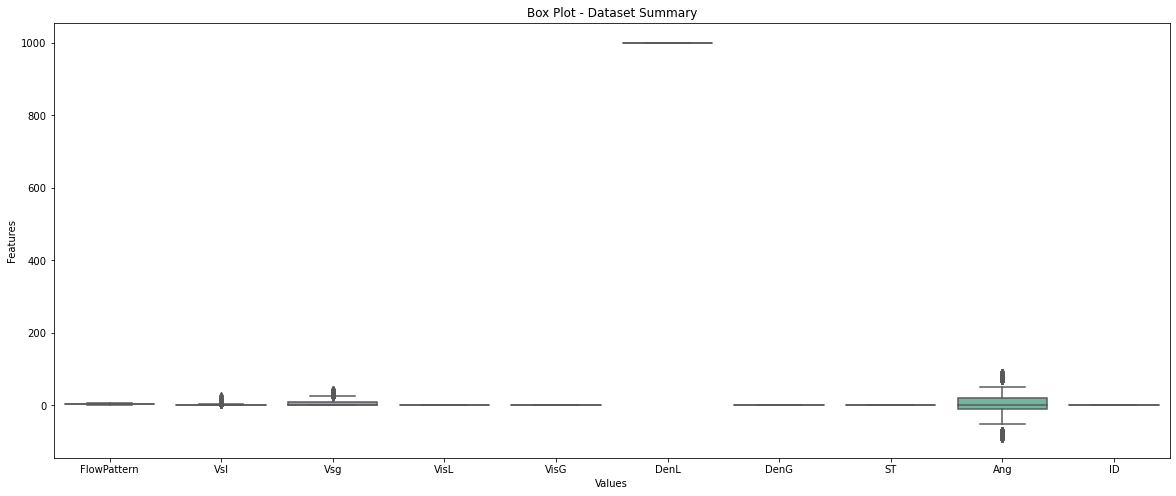

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load the dataset
df = pd.read_csv("BDOShoham.csv")


display(df.head(5))
display(df.tail(5))

plt.figure(figsize=(20, 8))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.title("Box Plot - Dataset Summary")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()


# **Making Sub- Dataset**

In [3]:
X = df[["Vsl", "Vsg", "Ang"]]
y = df["FlowPattern"]


In [12]:
X.head()

,Vsl,Vsg,Ang
0,6.3,0.025,0.0
1,4.0,0.040,0.0
2,6.3,0.040,0.0
3,4.0,0.063,0.0
4,6.3,0.063,0.0


# **Train Test Split**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [18]:
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)


Training set size: (4540, 3) (4540,)
Test set size: (1135, 3) (1135,)


# **Train and Test with k-NN & logistic regression Models**

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define hyperparameters for k-NN
knn_params = {
    'n_neighbors': 7,  # Optimal number of neighbors from GridSearchCV
    'weights': 'distance',  # Uniform or Distance
    'metric': 'euclidean'  # Euclidean or Manhattan
}

# Define hyperparameters for Logistic Regression
log_reg_params = {
    'C': 1.0,  # Regularization strength (inverse)
    'penalty': 'l2',  # L1 or L2 regularization
    'solver': 'lbfgs'  # Optimization algorithm
}

# Train k-NN with hyperparameters
knn = KNeighborsClassifier(**knn_params)
knn.fit(X_train, y_train)

# Train Logistic Regression with hyperparameters
log_reg = LogisticRegression(**log_reg_params, max_iter=5000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Define evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance on Test Set:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision (Weighted): {precision_score(y_true, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Recall (Macro): {recall_score(y_true, y_pred, average='macro', zero_division=0):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='macro'):.4f}")

# Evaluate both models
evaluate_model(y_test, y_pred_knn, f"k-NN (n_neighbors={knn_params['n_neighbors']}, weights={knn_params['weights']}, metric={knn_params['metric']})")
evaluate_model(y_test, y_pred_log_reg, f"Logistic Regression (C={log_reg_params['C']}, penalty={log_reg_params['penalty']})")




k-NN (n_neighbors=7, weights=distance, metric=euclidean) Performance on Test Set:
Accuracy: 0.8599
Precision (Weighted): 0.8627
Recall (Macro): 0.8187
F1 Score: 0.8263

Logistic Regression (C=1.0, penalty=l2) Performance on Test Set:
Accuracy: 0.6573
Precision (Weighted): 0.6230
Recall (Macro): 0.4784
F1 Score: 0.5009


# **Cross validation using Training Data**

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define scoring metrics with zero_division handling
scoring_metrics = {
    "accuracy": make_scorer(accuracy_score),
    "precision_weighted": make_scorer(precision_score, average="weighted", zero_division=0),
    "recall_macro": make_scorer(recall_score, average="macro", zero_division=0),
    "f1_macro": make_scorer(f1_score, average="macro")
}

def cross_validate_model(model, X_train, y_train, scoring):
    results = {}
    for metric_name, scorer in scoring.items():
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
        print (scores)
        results[metric_name] = np.mean(scores)
    return results

# Perform cross-validation
knn_results = cross_validate_model(knn, X_train, y_train, scoring_metrics)
log_reg_results = cross_validate_model(log_reg, X_train, y_train, scoring_metrics)

print("KNN Results:\n",knn_results)
print("Logistic Regression Results:\n",log_reg_results)


[0.84030837 0.82268722 0.84581498 0.81828194 0.84140969]
[0.84487128 0.82933882 0.84976061 0.83073701 0.84730027]
[0.83080499 0.78100128 0.79943216 0.78634577 0.81750658]
[0.81135187 0.76012495 0.78576714 0.77597348 0.81008246]
[0.67511013 0.66079295 0.66079295 0.64537445 0.67400881]
[0.63942309 0.63203022 0.62344246 0.59488813 0.62817406]
[0.46330511 0.43612892 0.46369613 0.45484456 0.49664067]
[0.48240484 0.46107129 0.47805808 0.4575912  0.51595496]
KNN Results:
 {'accuracy': 0.8337004405286343, 'precision_weighted': 0.84040159732258, 'recall_macro': 0.8030181563115123, 'f1_macro': 0.7886599814166277}
Logistic Regression Results:
 {'accuracy': 0.663215859030837, 'precision_weighted': 0.6235915917097874, 'recall_macro': 0.46292307825017476, 'f1_macro': 0.4790160744318353}


# **Choosing Best Hyperparameters of K-NN using GridSearchCV()**

In [6]:
from sklearn.model_selection import GridSearchCV



# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Different values for number of neighbors
    'weights': ['uniform', 'distance'],  # Different strategies for weight assignment
    'metric': ['euclidean', 'manhattan']  # Different distance metrics
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from the grid search
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")




Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.8599118942731276


# **Evaluating Model Performance (K-NN) on Test data Using Best Hyperparameters**

In [13]:
# Evaluate the model with the best hyperparameters on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy with Optimized Hyperparameters: {test_accuracy}")


Test Accuracy with Optimized Hyperparameters: 0.8731277533039647


### Without using best hyperparameters K-NN accuracy was 0.8599 on test data,but after using best hyperparameters (through GridSearchCV) K-NN accuracy is 0.8731 on test data.So,finding/choosing the best hyperparameters settings improves the model performance.